## 1 - Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
plt.close('all')
import os
if not os.path.exists('Store_Sales_Predictions_EDA'):
    os.makedirs('Store_Sales_Predictions_EDA')
from IPython.core.interactiveshell import InteractiveShell
#Integrated Development Environment (IDLE)
#display full output in Jupyter, not only last result
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from datetime import datetime
start_time = datetime.now()

In [3]:
# !rm -rf drive/

## 2 - Importing Datasets

In [4]:
df_train = pd.read_csv('train.csv', parse_dates=['Date'],
                       date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))

df_store = pd.read_csv('store.csv')

df_submission = pd.read_csv('submission.csv')

df_test = pd.read_csv('test.csv', parse_dates=['Date'],
                      date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))

In [5]:
print(f'df_train_shape = {df_train.shape}')
print(f'df_store_shape = {df_store.shape}')
print(f'df_submission_shape = {df_submission.shape}')
print(f'df_test_shape = {df_test.shape}')

df_train_shape = (1017209, 9)
df_store_shape = (1115, 10)
df_submission_shape = (41088, 2)
df_test_shape = (41088, 8)


In [6]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [8]:
df_submission

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [9]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [10]:
df_train.sort_values('Date', inplace=True)

## 3 - Exploratory Data Analysis(EDA)

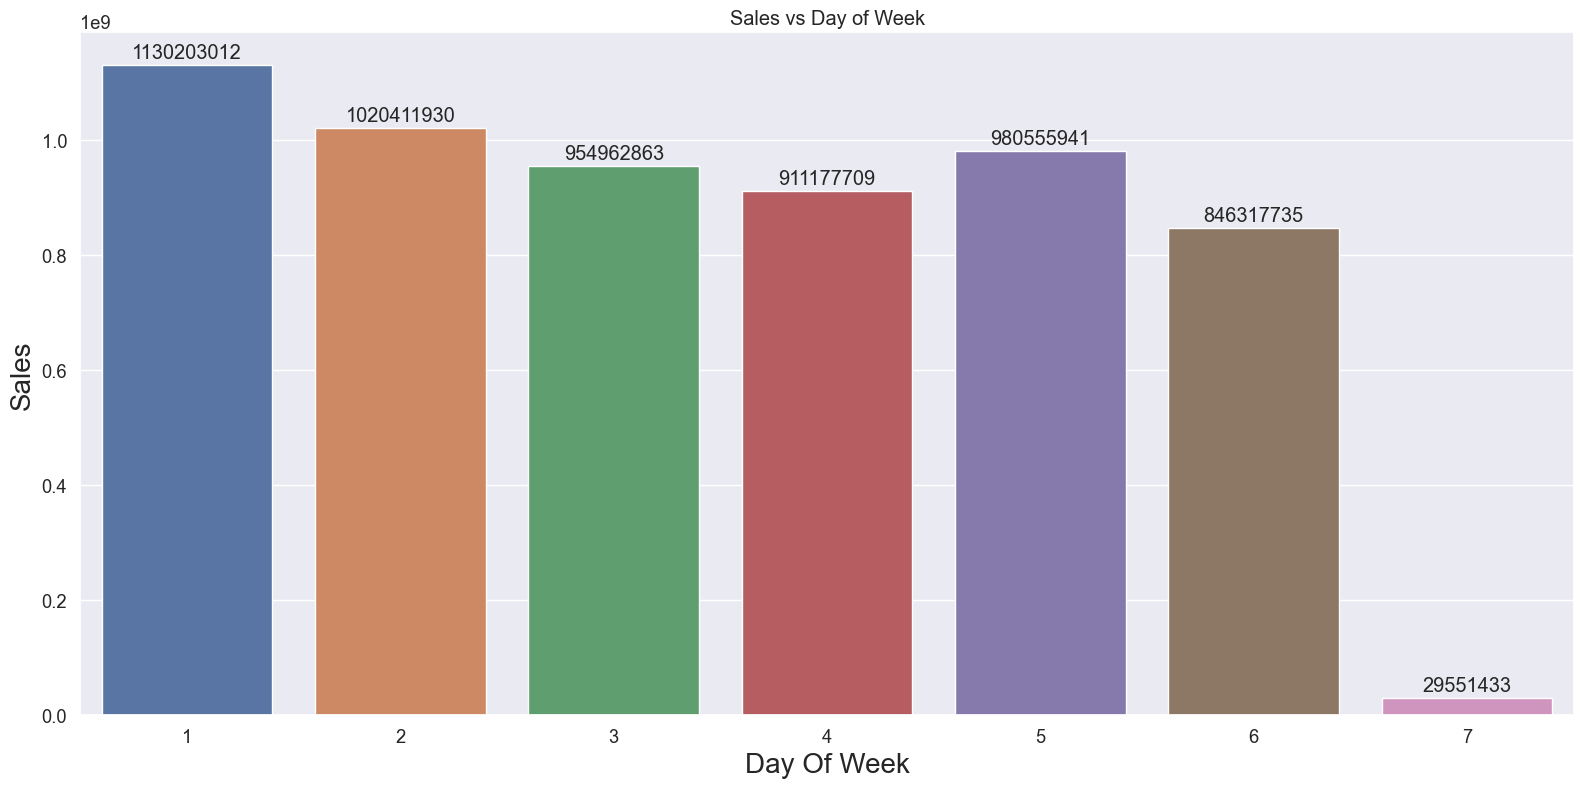

In [11]:
# Plot the sum of sales vs day of week
d1 = df_train.groupby(by='DayOfWeek')['Sales'].sum()
d1 = pd.DataFrame(d1)
d1 = d1.sort_values(by="Sales", ascending=False)
d1 = d1.reset_index()
plt.figure(figsize=(16,8));
sn.set(font_scale=1.2)
ax = sn.barplot(x="DayOfWeek", y="Sales", data=d1)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.tight_layout();
plt.title('Sales vs Day of Week');
plt.xlabel("Day Of Week", size = 20);
plt.ylabel("Sales", size = 20);
plt.savefig('Store_Sales_Predictions_EDA/DayOfWeek_Sales_Plot',dpi=100);

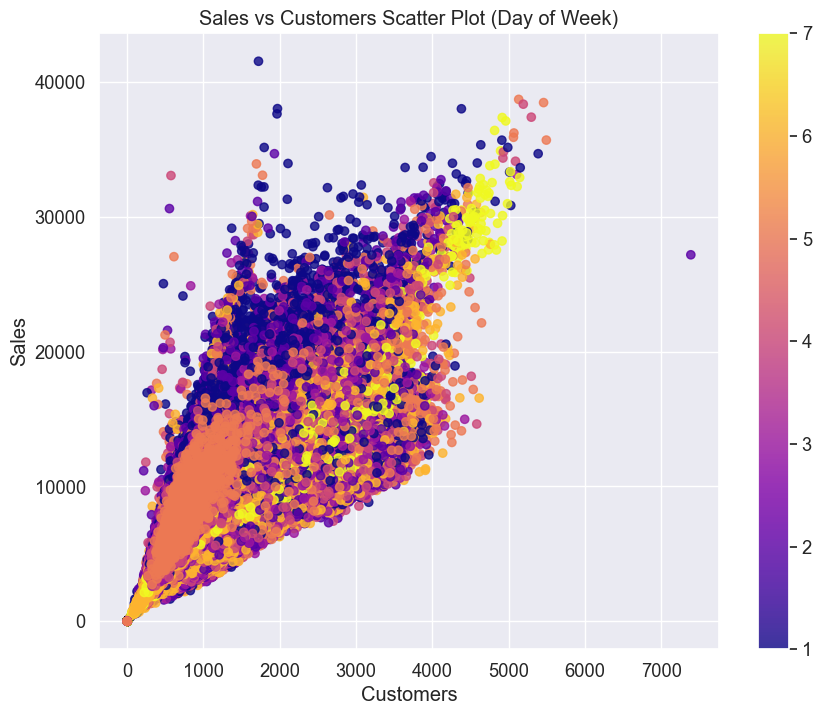

In [12]:
# Sales vs Customers based on DayOfWeek Scatter Plot
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(df_train['Customers'], df_train['Sales'], c=df_train['DayOfWeek'], alpha=0.8, cmap=plt.cm.get_cmap('plasma'));
plt.colorbar()
plt.title('Sales vs Customers Scatter Plot (Day of Week)')
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Customers DayOfWeek Scatter Plot',dpi=100);
plt.show();

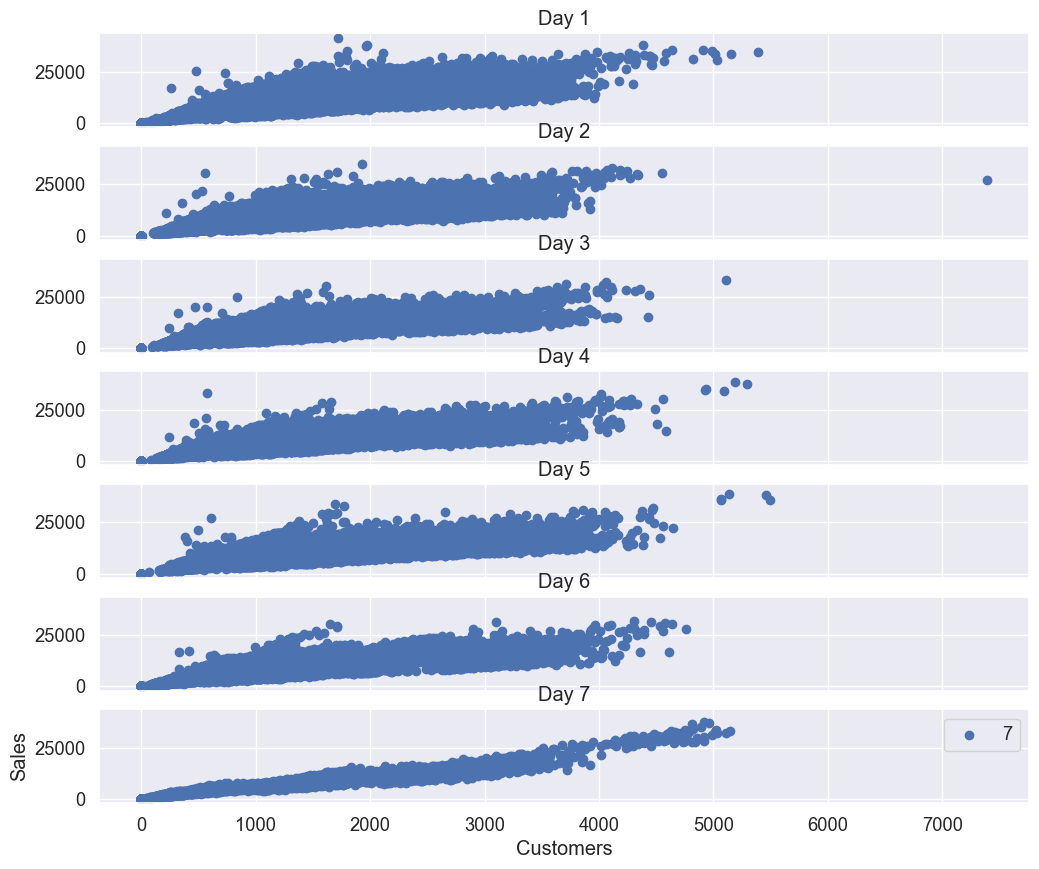

In [13]:
# Plot sales vs day of week
_ = plt.rcParams['figure.figsize'] = (12.0, 10.0)
_ = f, ax = plt.subplots(7, sharex=True, sharey=True)
_ = plt.rcParams['figure.figsize'] = (10.0, 50.0)
for i in range(1, 8):
    mask = df_train[df_train['DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i));
    ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i);

plt.legend();
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs day of week Plot',dpi=100, bbox_inches='tight')
plt.show();

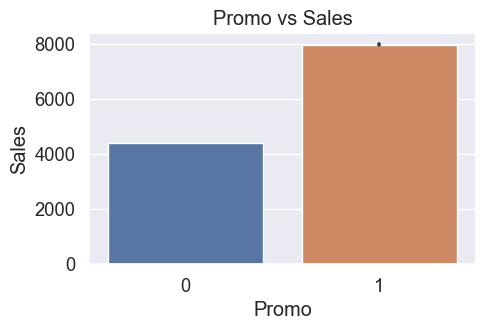

In [14]:
# Sales vs Promo plot
plt.figure(figsize=(5,3));
plt.title('Promo vs Sales');
sn.barplot(x='Promo', y='Sales', data=df_train)
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Promo Plot',dpi=100);

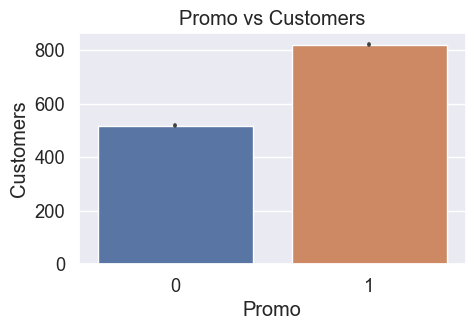

In [15]:
# Promo vs Customers plot
plt.figure(figsize=(5,3));
plt.title('Promo vs Customers');
sn.barplot(x='Promo', y='Customers', data=df_train)
plt.savefig('Store_Sales_Predictions_EDA/Promo vs Customers Plot',dpi=100);

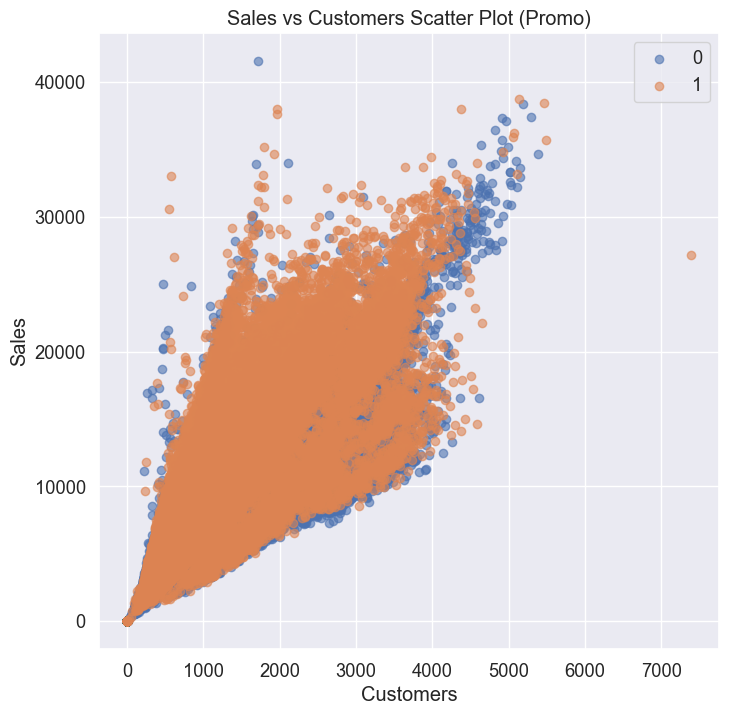

In [16]:
# Sales vs Customers based on promo Scatter Plot
plt.rcParams['figure.figsize'] = (8, 8)
for i in [0, 1]:
    data = df_train[df_train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i, alpha=0.6);
plt.legend();
plt.title('Sales vs Customers Scatter Plot (Promo)')
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Customers promo Scatter Plot',dpi=100);
plt.show();

In [17]:
# Merge store dataframe with train dataframe and test dataframe according to store number
merged_df_train = df_train.merge(df_store,how='left',on='Store')
merged_df_test  = df_test.merge(df_store,how='left',on='Store')

In [28]:
# splite year, month, day, weeks number
def split_date(df):
    df['Date']  = pd.to_datetime(df['Date'])
    df['Year']  = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day']   = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [29]:
split_date(merged_df_train)
split_date(merged_df_test)

In [33]:
pd.set_option('display.max_columns', None)
merged_df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1
1,379,2,2013-01-01,0,0,0,0,a,1,d,a,6630.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
2,378,2,2013-01-01,0,0,0,0,a,1,a,c,2140.0,8.0,2012.0,0,NaN,NaN,NaN,2013,1,1,1
3,377,2,2013-01-01,0,0,0,0,a,1,a,c,100.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov",2013,1,1,1
4,376,2,2013-01-01,0,0,0,0,a,1,a,a,160.0,8.0,2012.0,0,NaN,NaN,NaN,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,746,5,2015-07-31,9082,638,1,1,0,1,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2015,7,31,31
1017205,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1017206,748,5,2015-07-31,7481,578,1,1,0,1,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
1017207,742,5,2015-07-31,10460,1016,1,1,0,1,d,c,4380.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31,31


In [34]:
merged_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [35]:
merged_df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17,38
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17,38
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17,38
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,31
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1,31
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1,31
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1,31


In [36]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

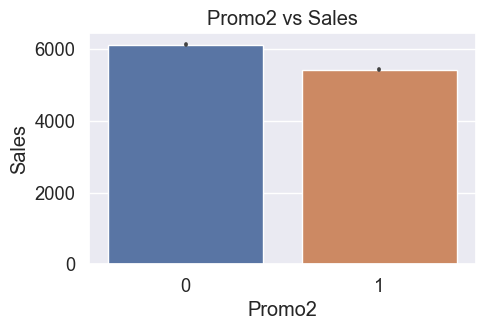

In [37]:
# Sales vs Promo2 plot
plt.figure(figsize=(5,3));
plt.title('Promo2 vs Sales');
sn.barplot(x='Promo2', y='Sales', data=merged_df_train)
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Promo2 Plot',dpi=100);

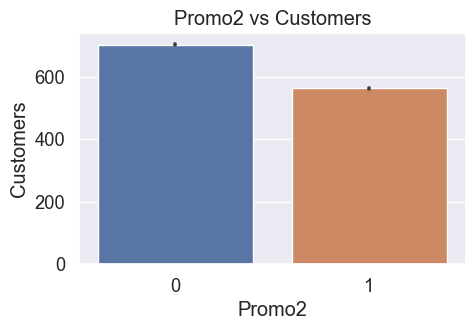

In [38]:
# Promo2 vs Customers plot
plt.figure(figsize=(5,3));
plt.title('Promo2 vs Customers');
sn.barplot(x='Promo2', y='Customers', data=merged_df_train)
plt.savefig('Store_Sales_Predictions_EDA/Promo2 vs Customers Plot',dpi=100);

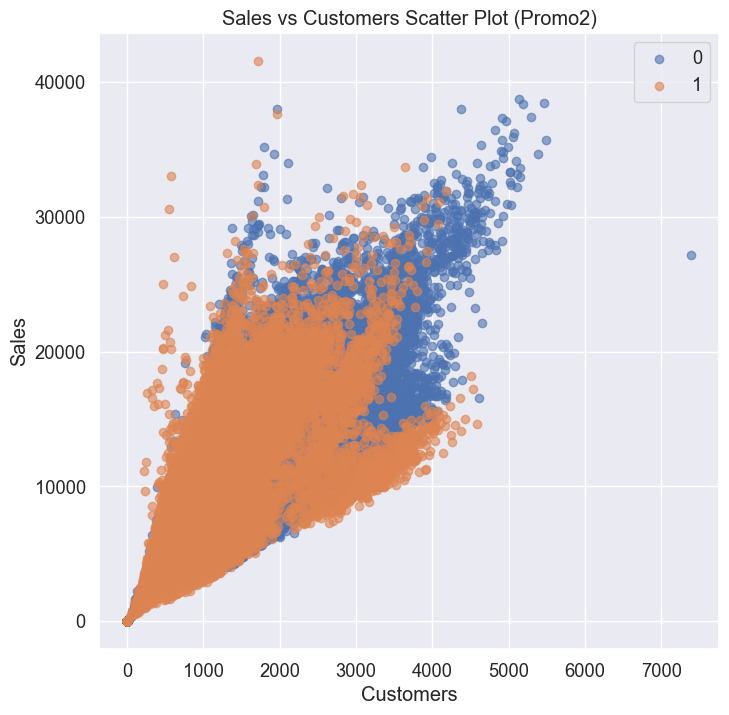

In [39]:
# Sales vs Customers based on promo2 Scatter Plot
plt.rcParams['figure.figsize'] = (8, 8)
for i in [0, 1]:
    data = merged_df_train[merged_df_train['Promo2'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i, alpha=0.6);
plt.legend();
plt.title('Sales vs Customers Scatter Plot (Promo2)')
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Customers promo2 Scatter Plot',dpi=100);
plt.show();

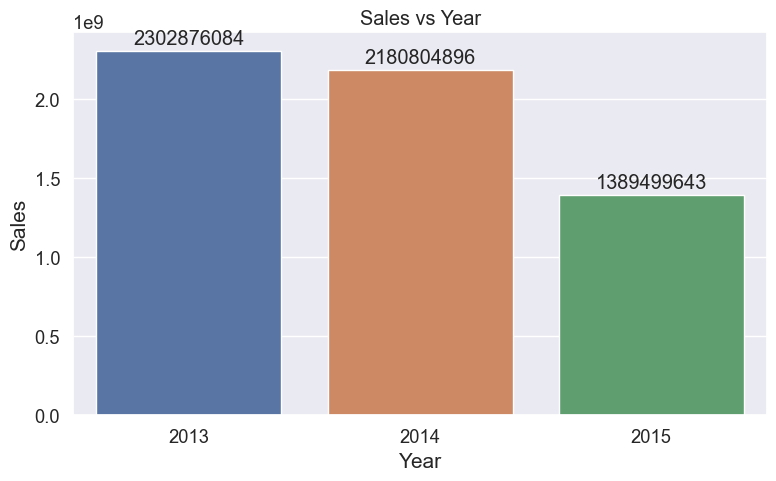

In [40]:
# Plot the sum of sales vs year
d1 = merged_df_train.groupby(by='Year')['Sales'].sum()
d1 = pd.DataFrame(d1)
d1 = d1.sort_values(by="Year", ascending=False)
d1 = d1.reset_index()
plt.figure(figsize=(8,5));
# sn.set(font_scale=1.2)
ax = sn.barplot(x="Year", y="Sales", data=d1)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.tight_layout();
plt.title('Sales vs Year');
plt.xlabel("Year", size = 15);
plt.ylabel("Sales", size = 15);
plt.savefig('Store_Sales_Predictions_EDA/Year_Sales_Plot',dpi=100);

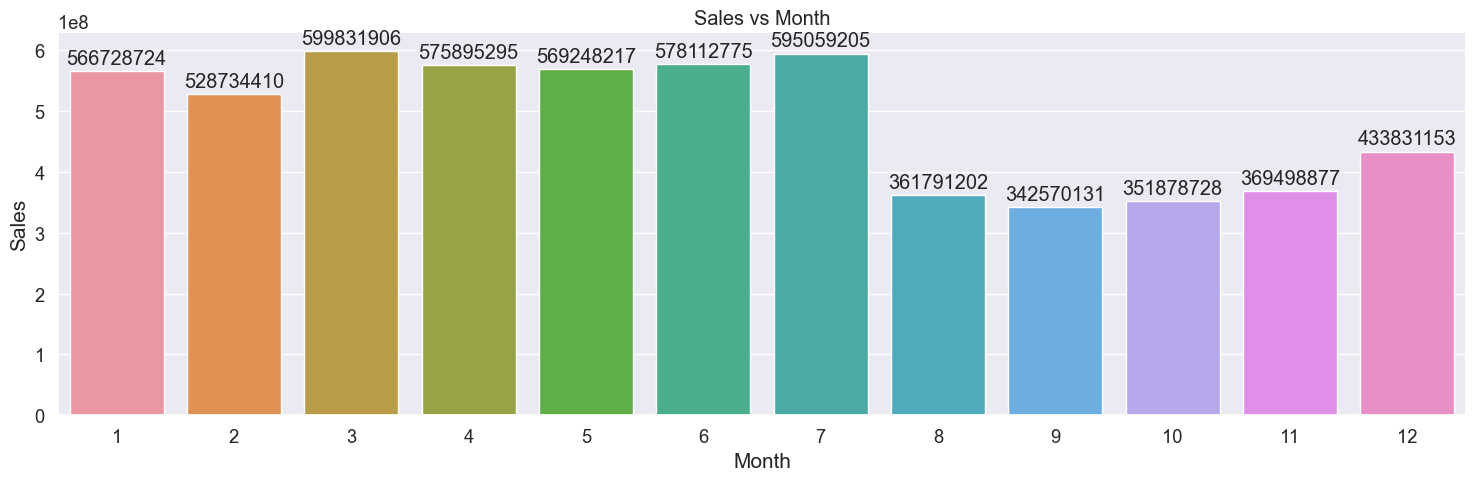

In [41]:
# Plot the sum of sales vs Month
d1 = merged_df_train.groupby(by='Month')['Sales'].sum()
d1 = pd.DataFrame(d1)
d1 = d1.sort_values(by="Month", ascending=False)
d1 = d1.reset_index()
plt.figure(figsize=(15,5));
# sn.set(font_scale=1.2)
ax = sn.barplot(x="Month", y="Sales", data=d1)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.tight_layout();
plt.title('Sales vs Month');
plt.xlabel("Month", size = 15);
plt.ylabel("Sales", size = 15);
plt.savefig('Store_Sales_Predictions_EDA/Month_Sales_Plot',dpi=100);

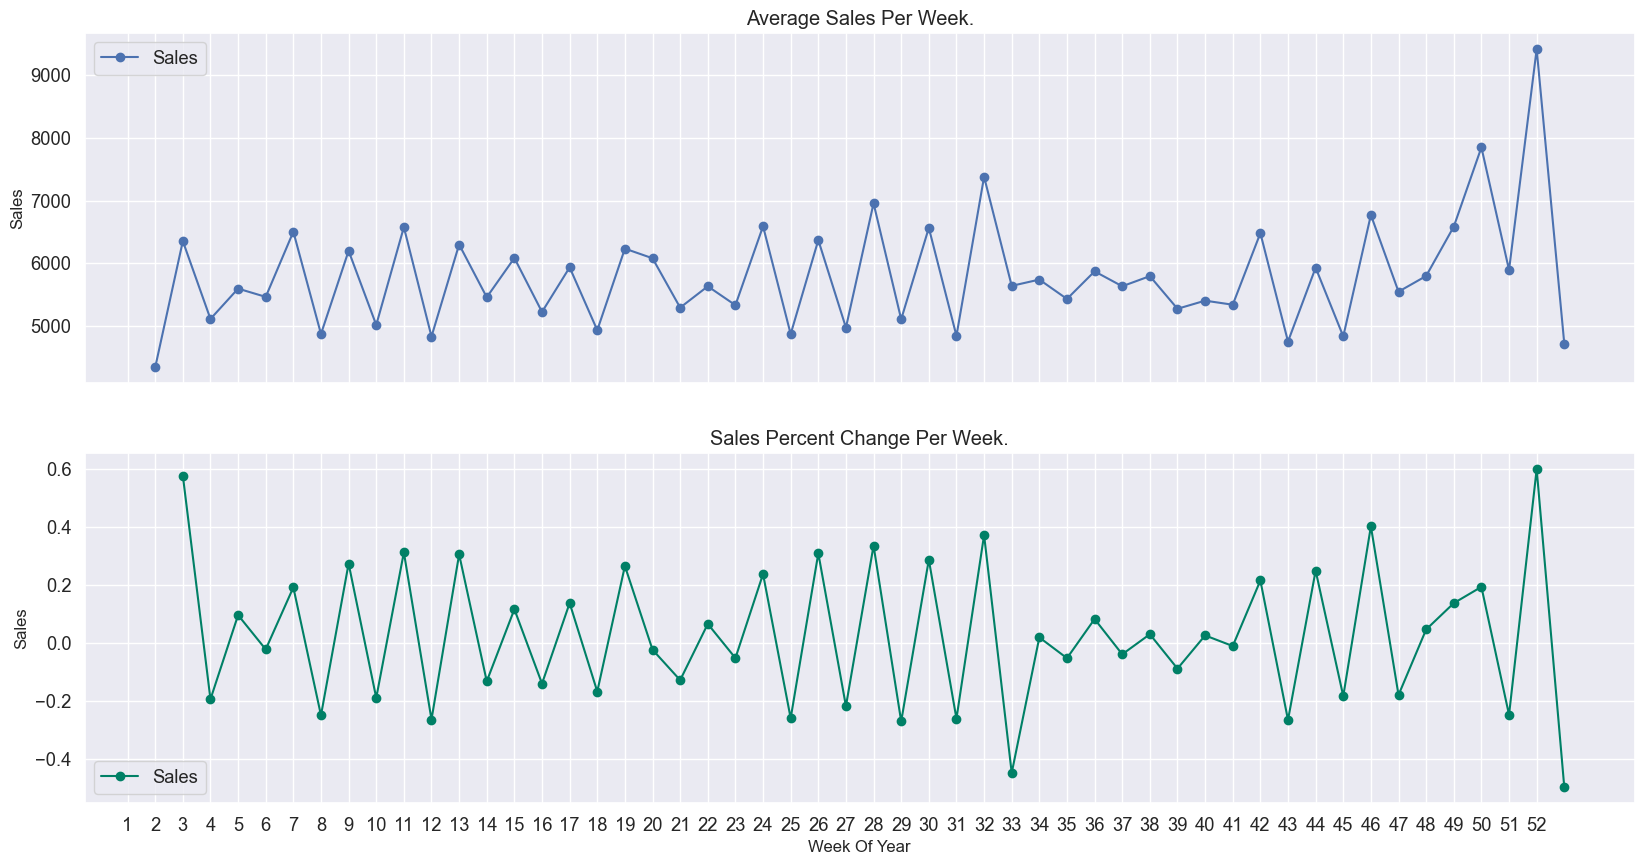

In [42]:
# group by date and get average sales, and precent change
average_sales    = merged_df_train.groupby('WeekOfYear')["Sales"].mean()
pct_change_sales = merged_df_train.groupby('WeekOfYear')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(20,10));

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True, ax=axis1, marker='o', title="Average Sales Per Week.")
ax1.set_xticks(range(len(average_sales)));
ax1.set_xticklabels(average_sales.index.tolist())
ax1.set_ylabel('Sales', size=12);

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True, ax=axis2, marker='o', colormap="summer", title="Sales Percent Change Per Week.")
plt.ylabel("Sales", size=12);
plt.xlabel('Week Of Year', size=12);

plt.savefig('Store_Sales_Predictions_EDA/avg sales vs week of year Plot',dpi=100);

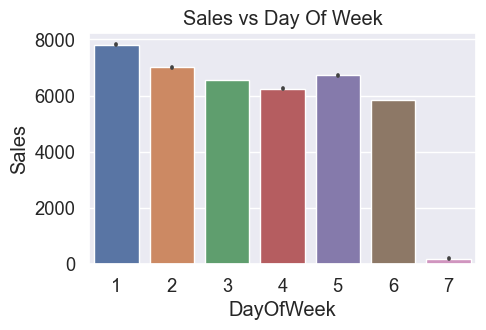

In [43]:
# Sales vs Day Of Week plot
# In both cases where the store is closed and opened
plt.figure(figsize=(5,3));
plt.title('Sales vs Day Of Week');
sn.barplot(x='DayOfWeek', y='Sales', data=df_train)
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Day Of Week Plot',dpi=100);

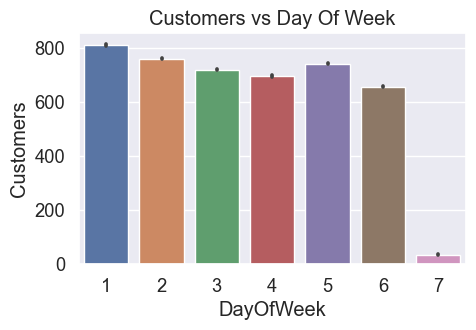

In [44]:
# Customers vs Day Of Week plot
# In both cases where the store is closed and opened
plt.figure(figsize=(5,3));
plt.title('Customers vs Day Of Week');
sn.barplot(x='DayOfWeek', y='Customers', data=df_train)
plt.savefig('Store_Sales_Predictions_EDA/Customers vs Day Of Week Plot',dpi=100);

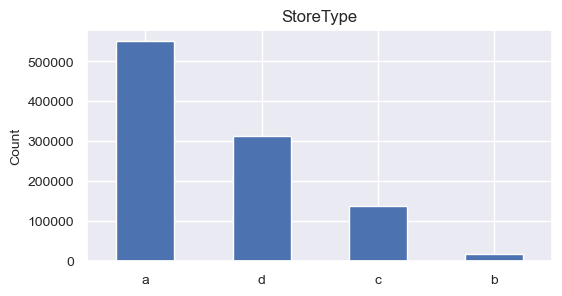

In [45]:
#Plotting the numbers of of StoreType
sn.set_style("darkgrid")
plt.figure(figsize=(6, 3))
merged_df_train['StoreType'].value_counts().plot(kind='bar', fontsize=10)
plt.title("StoreType", fontsize=12)
plt.xticks(rotation = 0)
plt.ylabel('Count', fontsize=10)
plt.savefig('Store_Sales_Predictions_EDA/Histogram of StoreType plot',dpi=200);
plt.show();

In [46]:
merged_df_train.StoreType.unique()

array(['d', 'a', 'c', 'b'], dtype=object)

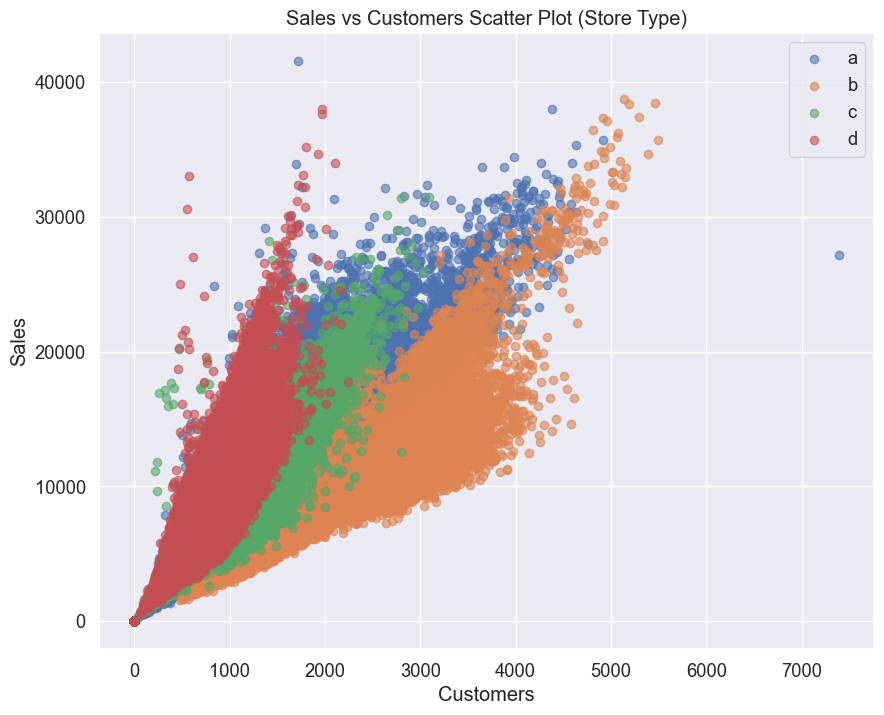

In [47]:
# Sales vs Customers based on StoreType Scatter Plot
plt.rcParams['figure.figsize'] = (10, 8)
for i in ['a', 'b', 'c', 'd']:
    data = merged_df_train[merged_df_train['StoreType'] == i]
    if(len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i, alpha=0.6);
plt.legend();
plt.title('Sales vs Customers Scatter Plot (Store Type)');
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Customers StoreType Scatter Plot',dpi=100);
plt.show();

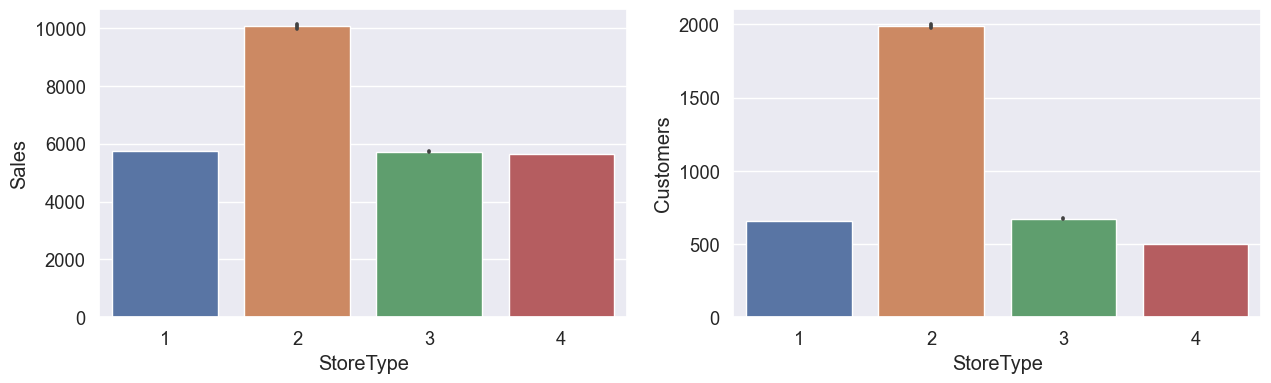

In [48]:
#StoreType
merged_df_train["StoreType"] = merged_df_train["StoreType"].map({"a": 1, "b": 2, "c": 3, "d": 4})
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4));
sn.barplot(x='StoreType', y='Sales', data=merged_df_train, ax=axis1)
sn.barplot(x='StoreType', y='Customers', data=merged_df_train, ax=axis2)
plt.savefig('Store_Sales_Predictions_EDA/StoreType vs sales and customers plot',dpi=200);

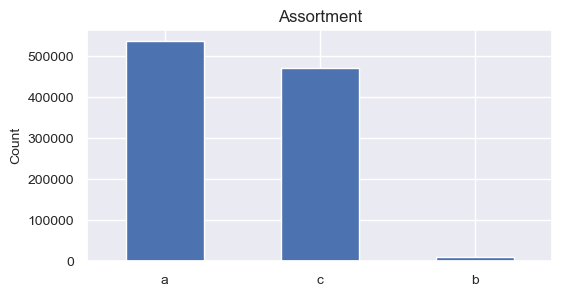

In [49]:
#Plotting the numbers of of Assortment
sn.set_style("darkgrid")
plt.figure(figsize=(6, 3))
merged_df_train['Assortment'].value_counts().plot(kind='bar', fontsize=10)
plt.title("Assortment", fontsize=12)
plt.xticks(rotation = 0)
plt.ylabel('Count', fontsize=10)
plt.savefig('Store_Sales_Predictions_EDA/Histogram of Assortment plot',dpi=200);
plt.show();

In [50]:
merged_df_train.Assortment.unique()

array(['c', 'a', 'b'], dtype=object)

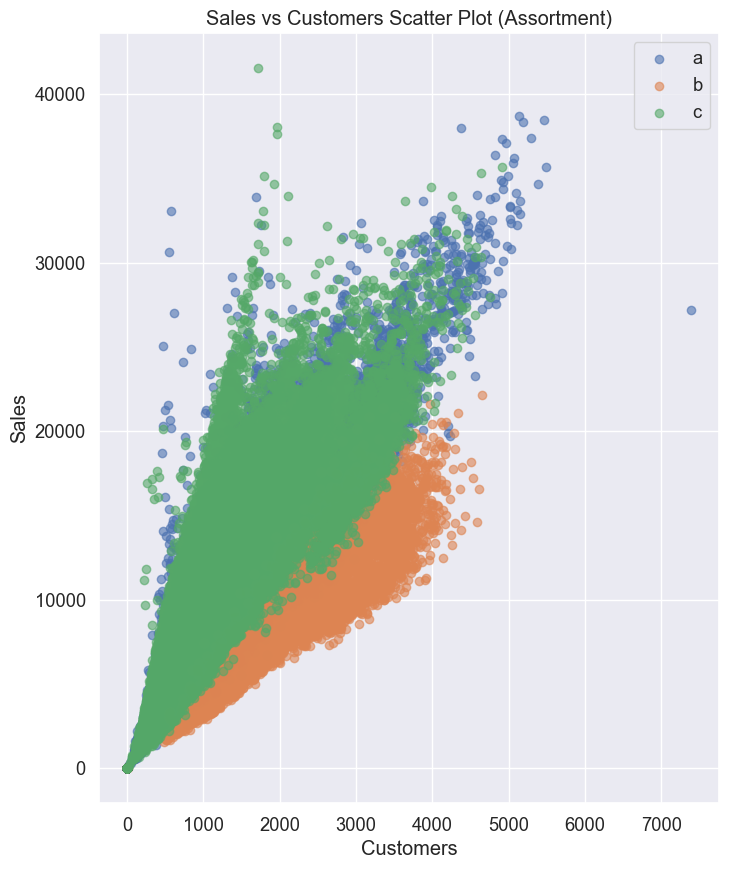

In [51]:
# Sales vs Customers based on Assortment Scatter Plot
plt.rcParams['figure.figsize'] = (8,10)
for i in ['a', 'b', 'c']:
    data = merged_df_train[merged_df_train['Assortment'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i, alpha=0.6);
plt.legend();
plt.title('Sales vs Customers Scatter Plot (Assortment)');
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Customers Assortment Scatter Plot',dpi=100);
plt.show();

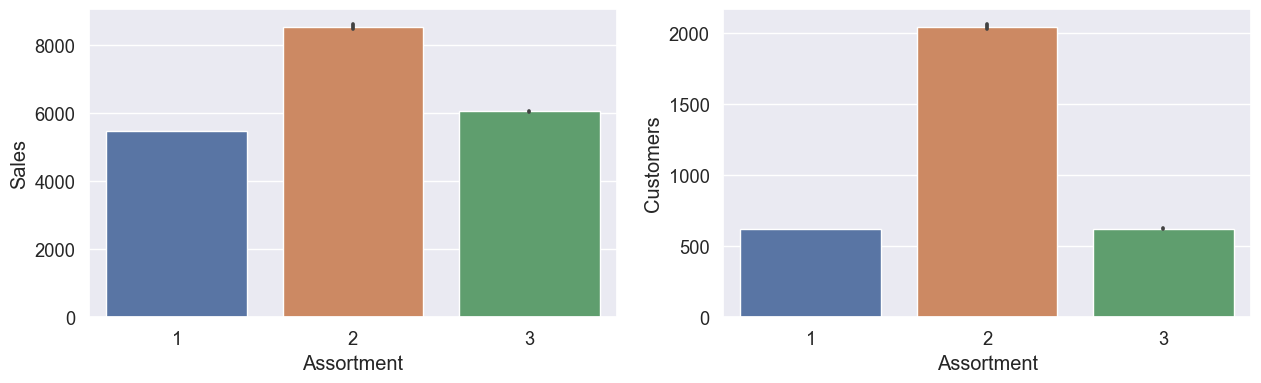

In [52]:
#Assortment
merged_df_train["Assortment"] = merged_df_train["Assortment"].map({"a": 1, "b": 2, "c": 3})
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4));
sn.barplot(x='Assortment', y='Sales', data=merged_df_train, ax=axis1)
sn.barplot(x='Assortment', y='Customers', data=merged_df_train, ax=axis2)
plt.savefig('Store_Sales_Predictions_EDA/Assortment vs sales and customers plot',dpi=200);

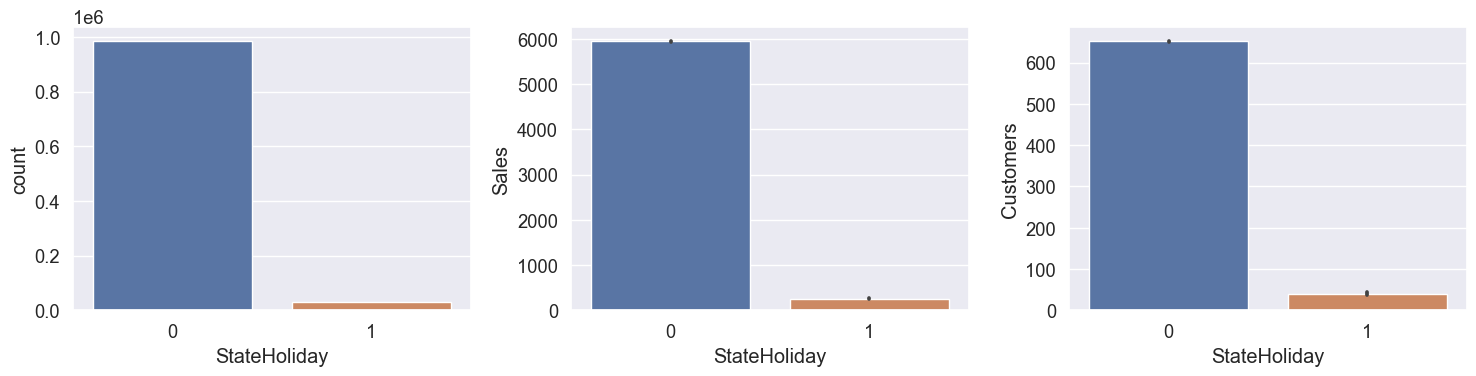

In [53]:
#State Holiday
df_train["StateHoliday"] = df_train["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4));
sn.countplot(x='StateHoliday', data=df_train, ax=axis1)
sn.barplot(x='StateHoliday', y='Sales', data=df_train, ax=axis2)
sn.barplot(x='StateHoliday', y='Customers', data=df_train, ax=axis3)
plt.tight_layout()
plt.savefig('Store_Sales_Predictions_EDA/State Holiday Plot',dpi=100);

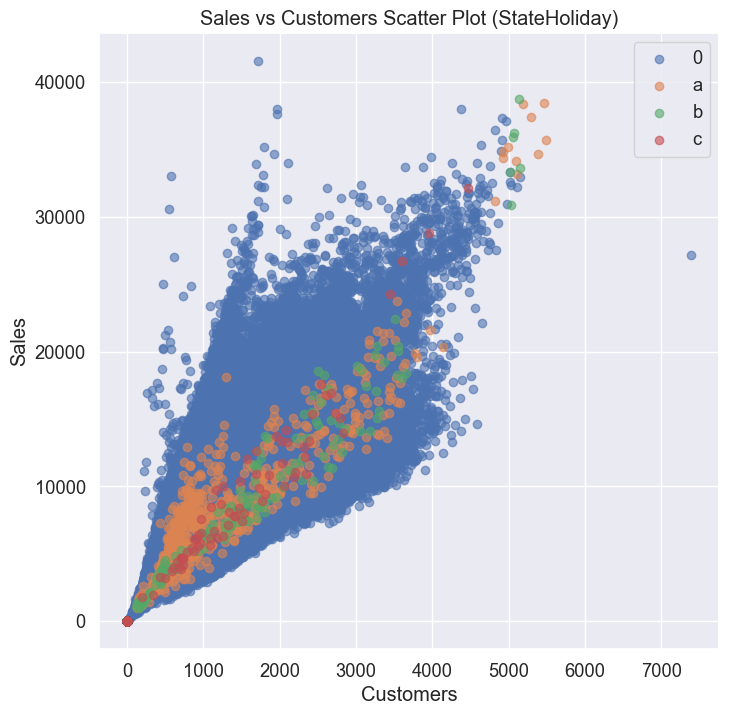

In [54]:
# Sales vs Customers based on StateHoliday Scatter Plot
plt.rcParams['figure.figsize'] = (8, 8)
for i in ["0", "a", "b", "c"]:
    data = merged_df_train[merged_df_train['StateHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i, alpha=0.6);
plt.legend();
plt.title('Sales vs Customers Scatter Plot (StateHoliday)')
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Customers StateHoliday Scatter Plot',dpi=100);
plt.show();

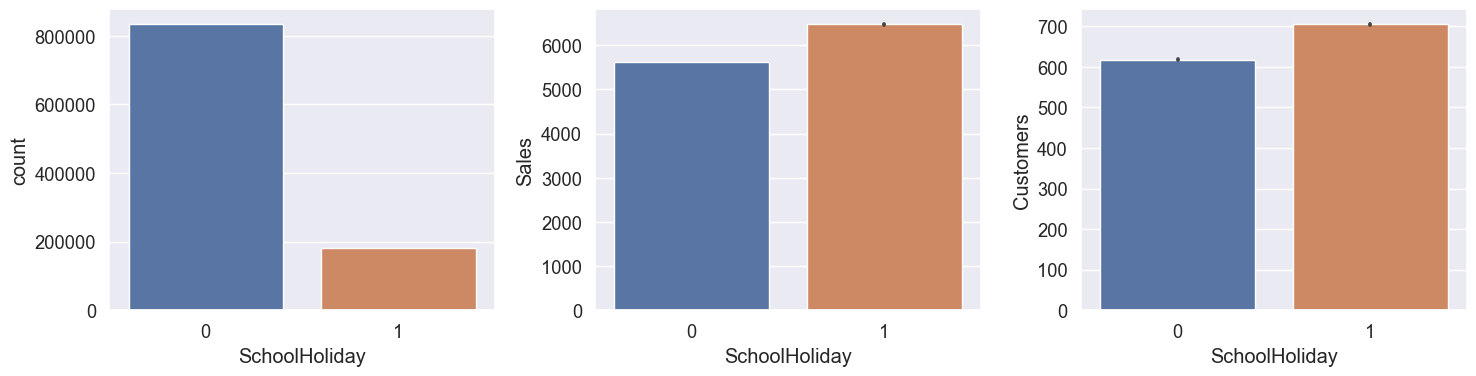

In [55]:
#School Holiday
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4));
sn.countplot(x='SchoolHoliday', data=df_train, ax=axis1)
sn.barplot(x='SchoolHoliday', y='Sales', data=df_train, ax=axis2)
sn.barplot(x='SchoolHoliday', y='Customers', data=df_train, ax=axis3)
plt.tight_layout()
plt.savefig('Store_Sales_Predictions_EDA/School Holiday Plot',dpi=100);

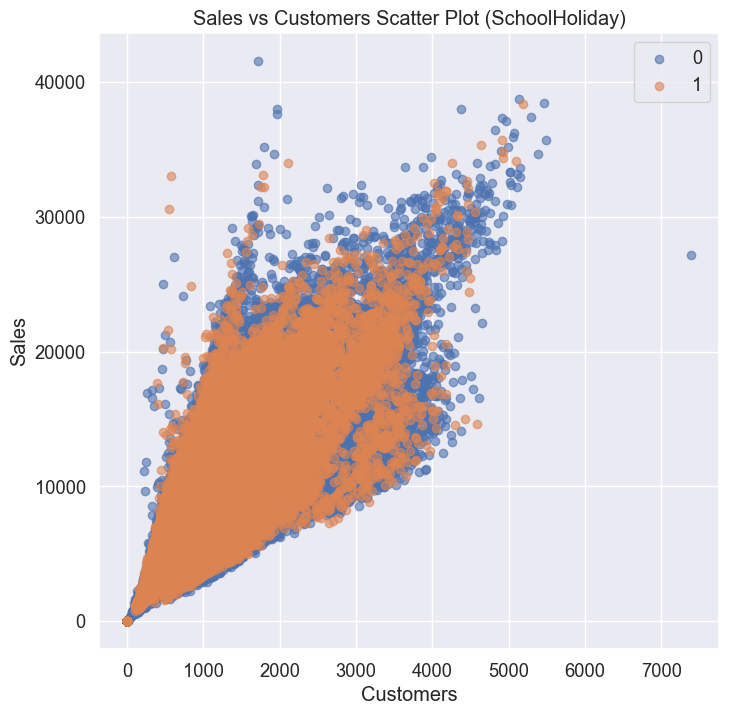

In [56]:
# Sales vs Customers based on SchoolHoliday Scatter Plot
plt.rcParams['figure.figsize'] = (8, 8)
for i in [0,1]:
    data = merged_df_train[merged_df_train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i, alpha=0.6);
plt.legend();
plt.title('Sales vs Customers Scatter Plot (SchoolHoliday)')
plt.xlabel('Customers');
plt.ylabel('Sales');
plt.savefig('Store_Sales_Predictions_EDA/Sales vs Customers SchoolHoliday Scatter Plot',dpi=100);
plt.show();

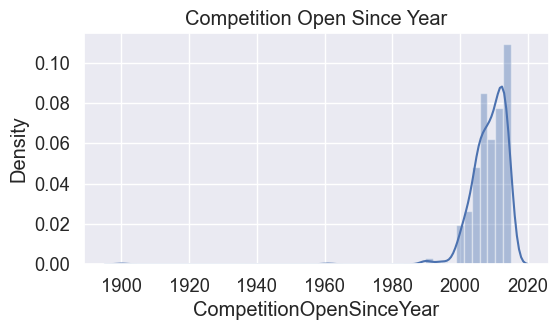

In [57]:
plt.figure(figsize=(6, 3))
sn.distplot(df_store['CompetitionOpenSinceYear'])
plt.title("Competition Open Since Year")
plt.savefig('Store_Sales_Predictions_EDA/Competition Open Since Year plot',dpi=200);

In [58]:
year_median = merged_df_train['CompetitionOpenSinceYear'].median()
print(f'Most of stores have their competition opened in the year {year_median}.')

Most of stores have their competition opened in the year 2010.0.


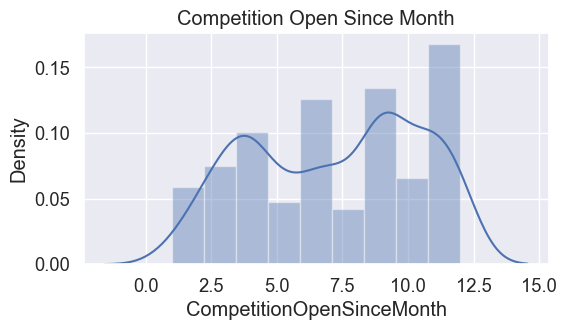

In [59]:
plt.figure(figsize=(6, 3))
sn.distplot(df_store['CompetitionOpenSinceMonth'])
plt.title("Competition Open Since Month")
plt.savefig('Store_Sales_Predictions_EDA/Competition Open Since Month plot',dpi=200);

In [60]:
month_median = df_store['CompetitionOpenSinceMonth'].median()
print(f'Most of stores have their competition opened in the month {month_median}.')

Most of stores have their competition opened in the month 8.0.


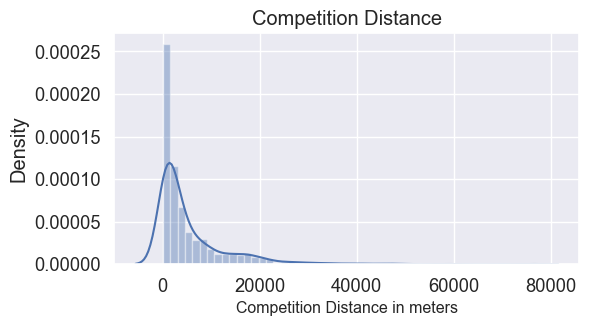

In [61]:
#Plotting distribution of Competition Distance.
plt.figure(figsize=(6, 3))
sn.distplot(df_store['CompetitionDistance'])
plt.title("Competition Distance")
plt.xlabel('Competition Distance in meters',fontsize=11.5)
plt.savefig('Store_Sales_Predictions_EDA/Competition Distance plot',dpi=200);

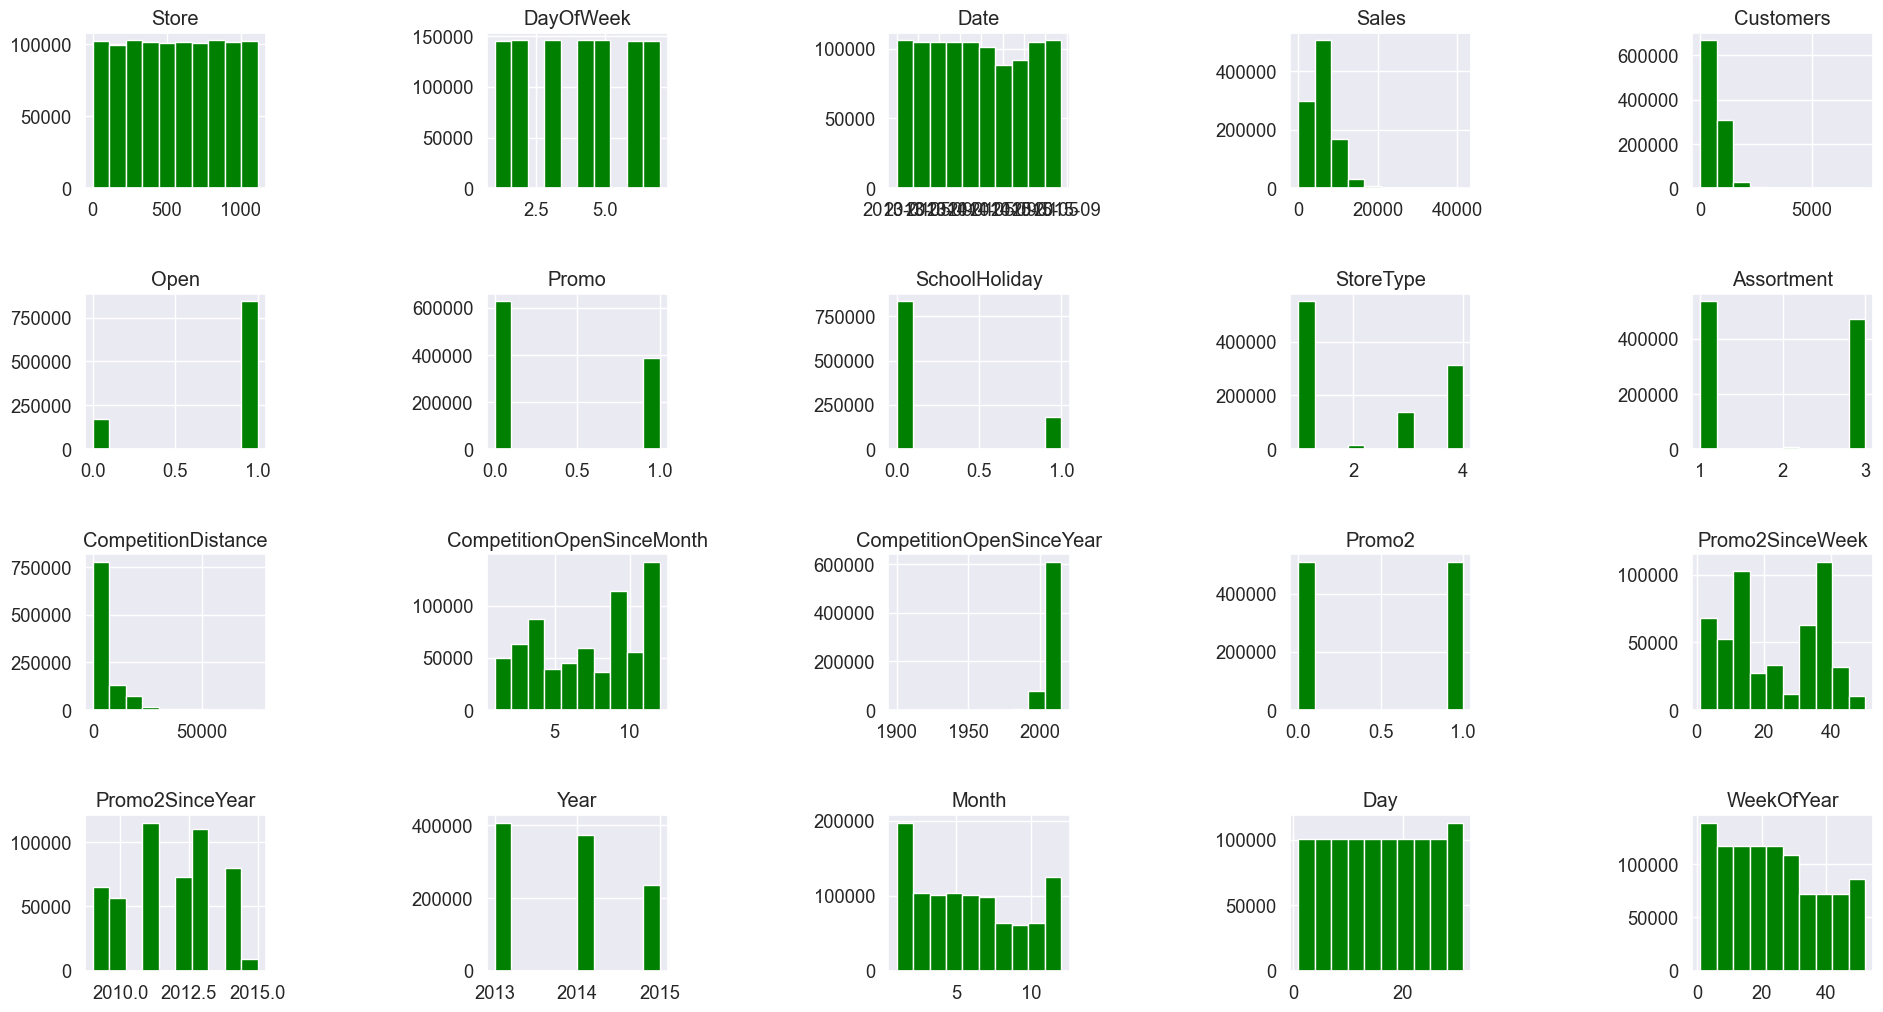

In [62]:
# Histogram Plot
_ = merged_df_train.hist(figsize = (20,18), layout = (7,5), color = "green")
fig = plt.gcf()
fig.savefig('Store_Sales_Predictions_EDA/Histogram-distributions-Plot',dpi=200);
plt.tight_layout()
plt.show()

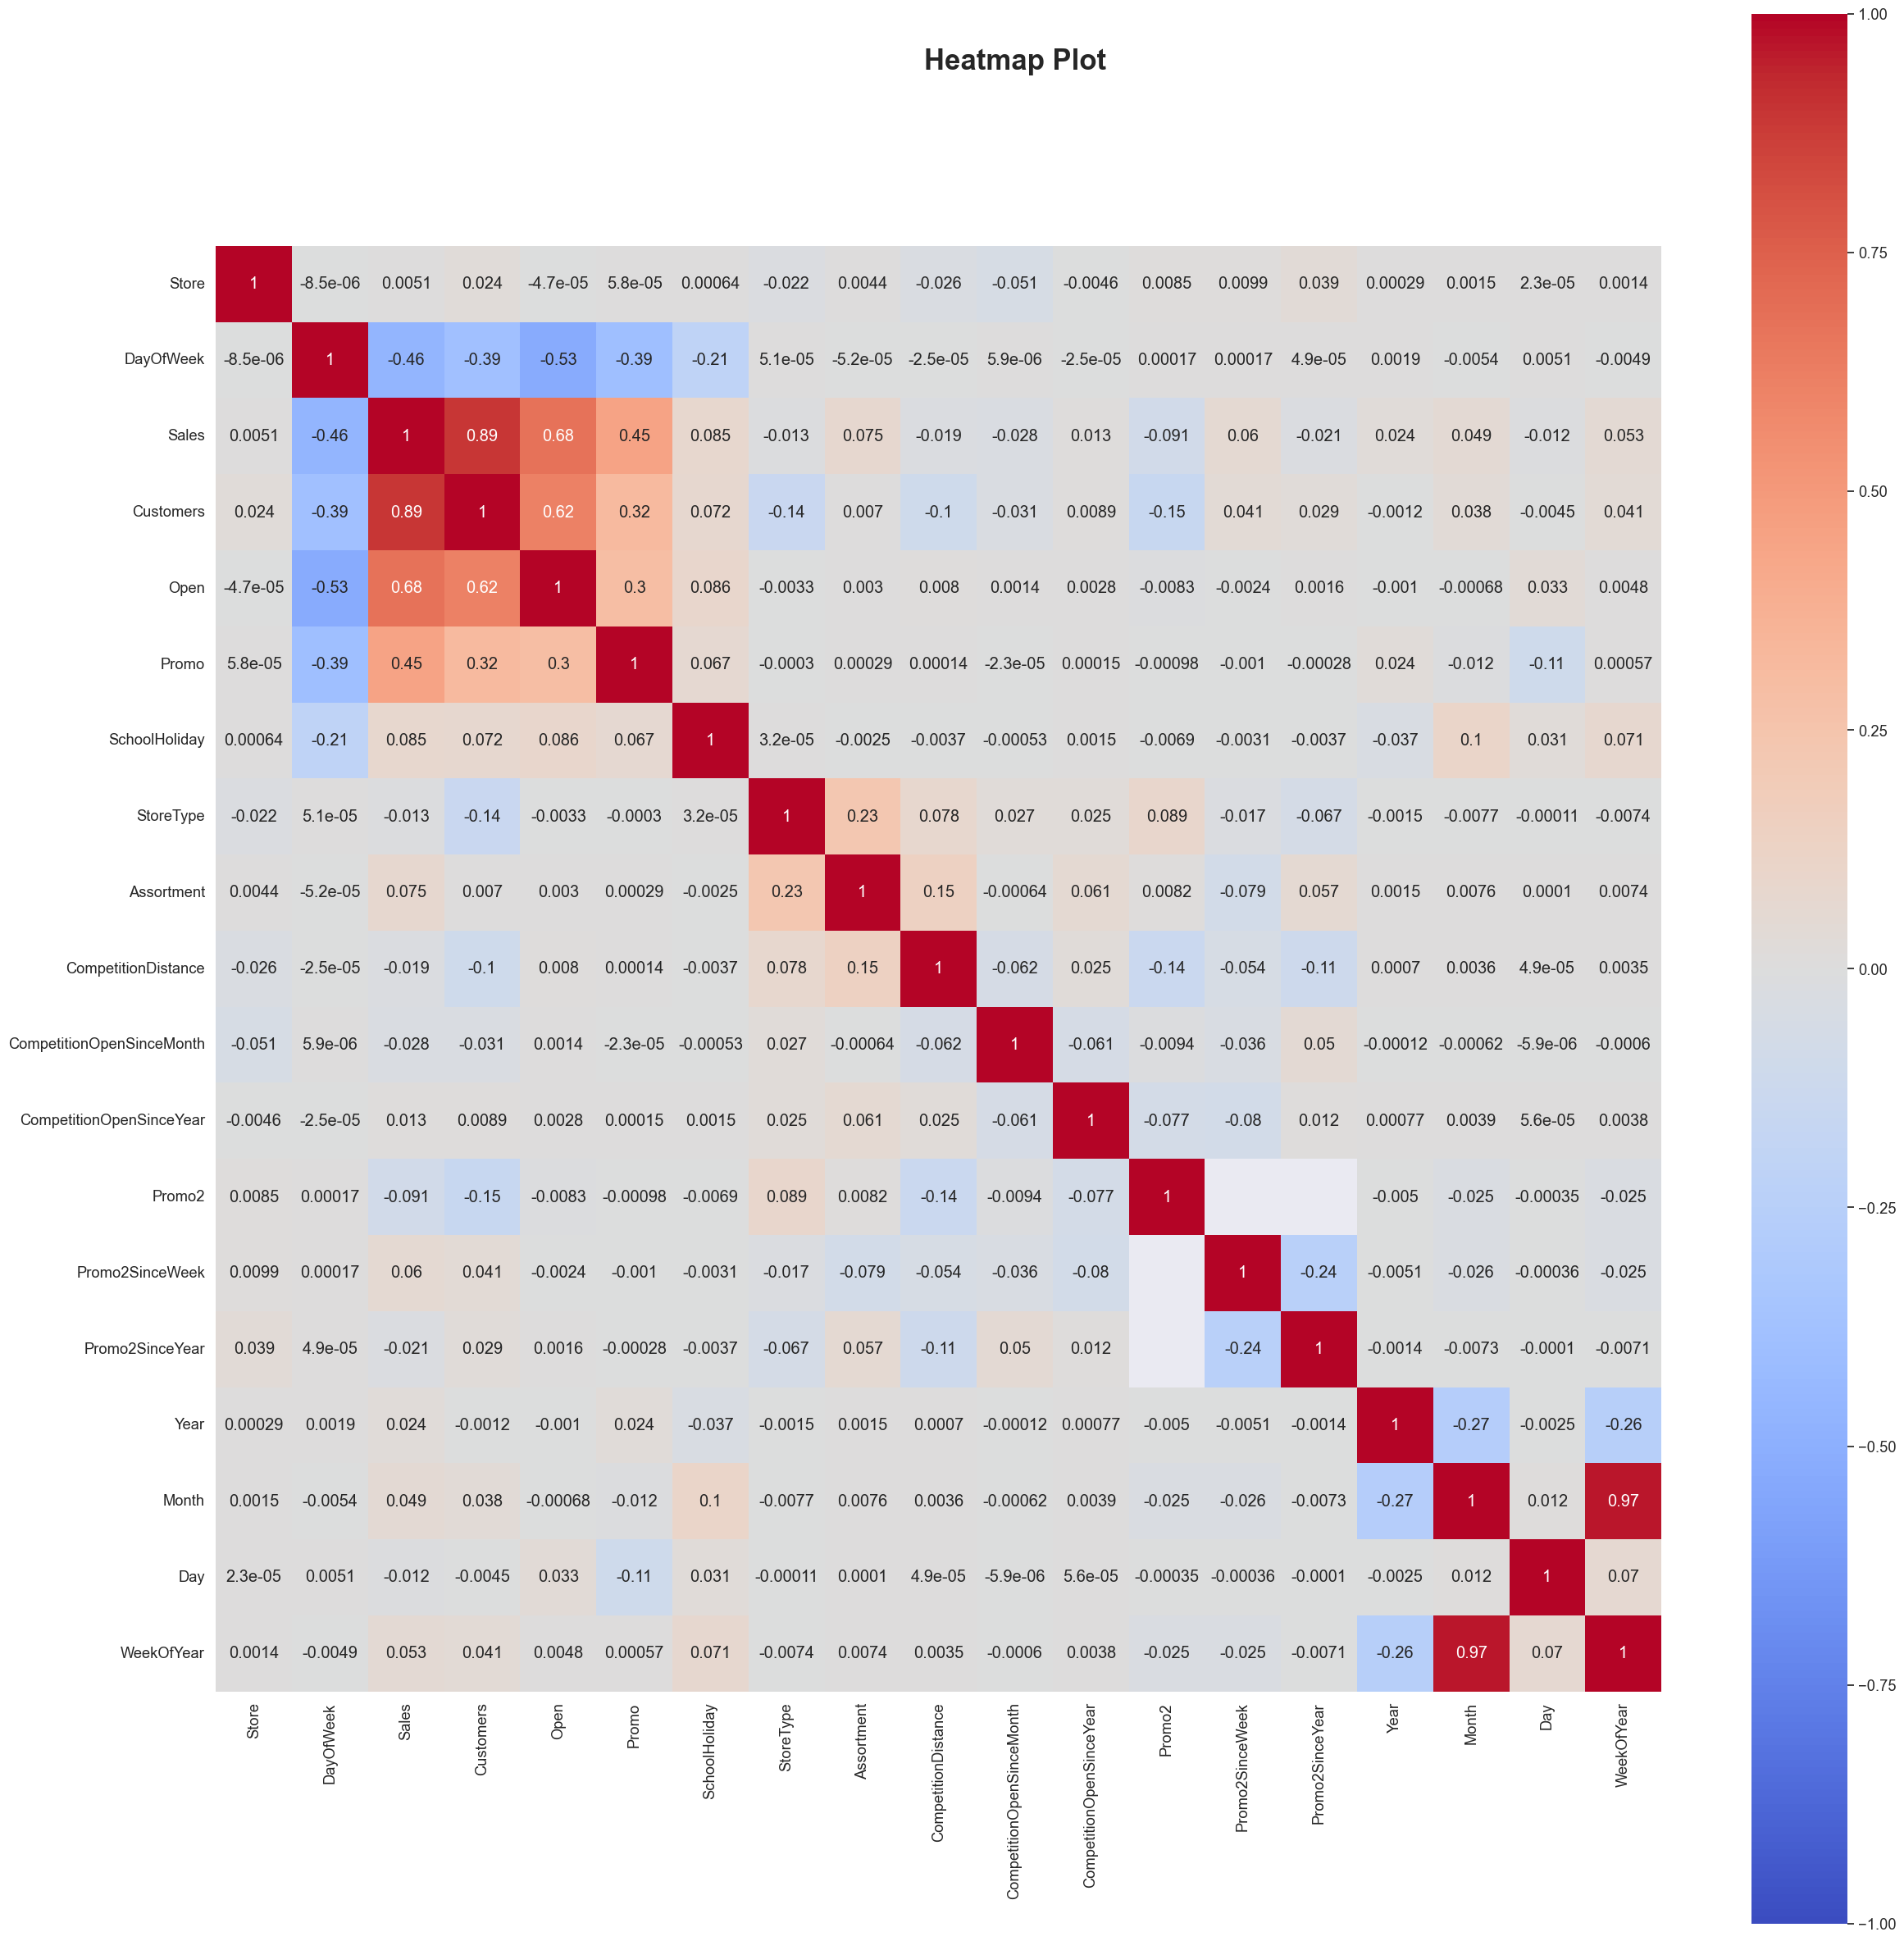

In [63]:
# Create Correlation Matrix
plt.figure(figsize=(25,25))
sn.set(font_scale=1.2)
sn.heatmap(merged_df_train.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);
plt.suptitle('Heatmap Plot',fontsize=25, fontweight='bold', y=0.95)
plt.tight_layout()
plt.savefig('Store_Sales_Predictions_EDA/Heatmap-Correlation-Plot',dpi=100, bbox_inches='tight', pad_inches=0.0);

In [64]:
end_time = datetime.now()
print('\nDuration of Runtime = {}'.format(end_time - start_time))


Duration of Runtime = 0:46:20.308332
